In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf




ROWS_PER_FRAME = 543  # number of landmarks per frame

def load_relevant_data_subset(pq_path):
    data_columns = ['x', 'y', 'z']
    data = pd.read_parquet(pq_path, columns=data_columns)
    n_frames = int(len(data) / ROWS_PER_FRAME)
    data = data.values.reshape(n_frames, ROWS_PER_FRAME, len(data_columns))
    return data.astype(np.float32)

In [12]:
# !pip install tflite-runtime
# import tflite_runtime.interpreter as tflite


interpreter = tf.lite.Interpreter("model.tflite")
found_signatures = list(interpreter.get_signature_list().keys())
prediction_fn = interpreter.get_signature_runner("serving_default")

# output = prediction_fn(inputs=demo_raw_data)
# sign = output['outputs'].argmax()

# print("PRED : ", ORD2SIGN.get(sign), f'[{sign}]')
# print("TRUE : ", train.sign.values[0], f'[{train.sign_ord.values[0]}]')

In [22]:
# Add ordinally Encoded Sign (assign number to each sign name)\
train = pd.read_csv('train.csv.zip')
train['sign_ord'] = train['sign'].astype('category').cat.codes

# Dictionaries to translate sign <-> ordinal encoded sign
SIGN2ORD = train[['sign', 'sign_ord']].set_index('sign').squeeze().to_dict()
ORD2SIGN = train[['sign_ord', 'sign']].set_index('sign_ord').squeeze().to_dict()

In [20]:
pq_file = "train_landmark_files/16069/100015657.parquet"
xyz_np = load_relevant_data_subset(pq_file)
prediction = prediction_fn(inputs=xyz_np)
sign = prediction['outputs'].argmax()



<Axes: >

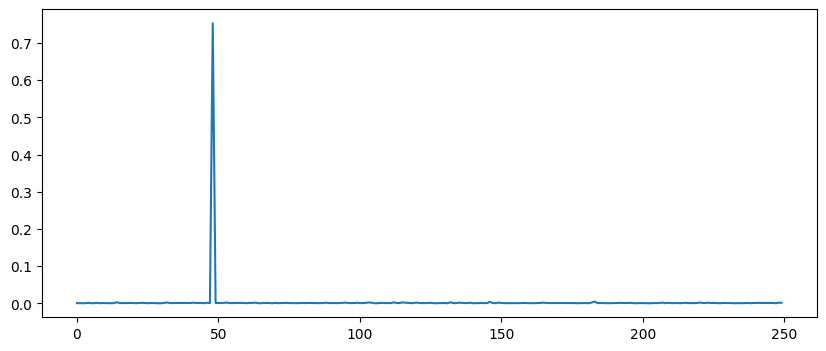

In [30]:
# ORD2SIGN[sign]
pd.Series(prediction['outputs']).plot(figsize=(10,4))